# NAMA  : ILHAM EKA PUTRA
# NIM      : 09011381722097
# KELAS : SK 5 PALEMBANG

# IMPLEMENTASI LOGIKA FUZZY MAMDANI UNTUK MENENTUKAN HARGA GABAH 

<div class="alert alert-success">
    <p align="justify">Konsep logika fuzzy pertama kali diperkenalkan oleh Professor Lotfi A.Zadeh dari Universitas California, pada bulan Juni 1965. Fuzzy secara bahasa diartikan sebagai kabur atau samar – samar.</p><br>
    <p align="justify">Menurut Setiadji (2009 : 174), <b>Fuzzy</b> merupakan suatu nilai yang dapat bernilai benar atau salah secara bersamaan. Namun seberapa besar nilai kebenaran dan kesalahannya tergantung pada derajat keanggotaan yang dimilikinya. Derajat keanggotaan dalam fuzzy memiliki rentang nilai 0 (nol) hingga 1(satu). Hal ini berbeda dengan himpunan tegas yang memiliki nilai 1 atau 0 (ya atau tidak).</p><br> 
    <p align="justify"><b>Logika Fuzzy</b> digunakan untuk menterjemahkan suatu besaran yang diekspresikan menggunakan bahasa (linguistik), misalkan besaran kecepatan laju kendaraan yang diekspresikan dengan pelan, agak cepat, cepat, dan sangat cepat. Dan logika fuzzy menunjukkan sejauh mana suatu nilai itu benar dan sejauh mana suatu nilai itu salah. Tidak seperti logika tegas, suatu nilai hanya mempunyai 2 kemungkinan yaitu merupakan suatu anggota himpunan atau tidak. Derajat keanggotaan 0 (nol) artinya nilai bukan merupakan anggota himpunan dan 1 (satu) berarti nilai tersebut adalah anggota himpunan.</p><br></div> 

# I. METODE FUZZY YANG DIGUNAKAN

Metode fuzzy yang digunakan adalah Mamdani. Langkah-langkah dalam metode mamdani, antara lain:  
1. Fuzzifikasi
2. Rule Base
3. Mekanisme Inferensi
4. Defuzifikasi

# II. PENYELESAIAN DENGAN PYTHON

- Import Library

In [89]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Input :
Kadar air dibagi menjadi 3 bagian yakni :
- Rendah = (0% - 14%)
- Sedang = (13% - 25%)
- Tinggi = (23% - 50%)

Kadar Hampa dibagi menjadi 3 bagian yakni:
- Sedikit = (0%- 3%)
- Sedang  = (2 - 10%)
- Banyak  = (8% - 20%)

Output : 
Kualitas harga di bagi menjadi 3 bagian yakni :
- Rendah                    = (Rp.3,500 - Rp.4,100)
- GKP (Gabah Kering Panen)  = (Rp.4,000 - Rp.4,700)
- GKG (Gabah Kering Giling) = (Rp.4,500 - Rp.5,000)

Kadar air mempunyai rentang nilai dari 0% - 50%

In [90]:
kadar_air = ctrl.Antecedent(np.arange(0, 50, 1), 'kadar air')
kadar_air_x = np.arange(0, 50, 1)

# Fuzzifikasi Kadar Air

<div class="alert alert-success">

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik).

Untuk kadar air, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Kadar Air $$
$$ Rendah = 0 - 14 $$
$$ Sedang = 13 - 25 $$
$$ Tinggi = 23 - 50 $$

<div class="alert alert-warning">

Dengan fungsi keanggotaan kadar air
$$ \mu Rendah [x] =
\begin{cases}
    1 & ; x \leq 13\\
    \frac{(14-x)}{(14-13)} & ; 13 \leq  x \leq\ 14 \\
    0 & ; x \geq 14
\end{cases}
$$

$$ \mu Sedang [x] =
\begin{cases}
    0 & ; x \leq 13\\
    \frac{(x-13)}{(19-13)} & ;13 \leq x \leq\ 19 \\
    \frac{(25-x)}{(25-19)} & ; 19 \leq  x \leq\ 25 \\
\end{cases}
$$

$$ \mu Tinggi [x] = 
\begin{cases}
    0 & ; x \leq 23\\
    \frac{(x-23)}{(30-23)} & ;23 \leq x \leq\ 30 \\
    1 & ; x \geq 30
\end{cases}
$$

In [91]:
kadar_air['rendah'] = fuzz.trapmf(kadar_air.universe, [0, 0, 13, 14])
kadar_air['sedang'] = fuzz.trimf(kadar_air.universe, [13, 19, 25])
kadar_air['tinggi'] = fuzz.trapmf(kadar_air.universe, [23, 30, 50, 50])

### PLOTTING MEMBERSHIP FUNCTION KADAR AIR

Plotting fungsi keanggotaan $\mu KadarAirRendah(x)$

Text(0.5,1,'Kadar Air Rendah')

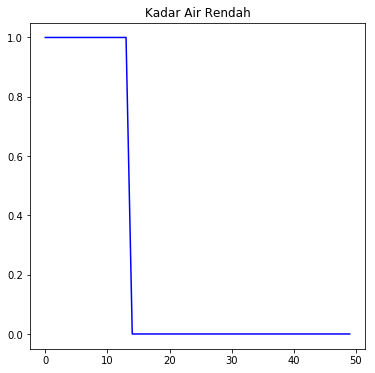

In [92]:
kadar_air_rendah = fuzz.trapmf(kadar_air_x,[0,0,13,14])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_air_x,kadar_air_rendah,'blue')
ax0.set_title('Kadar Air Rendah')

Plotting fungsi keanggotaan $\mu KadarAirSedang(x)$

Text(0.5,1,'Kadar Air Sedang')

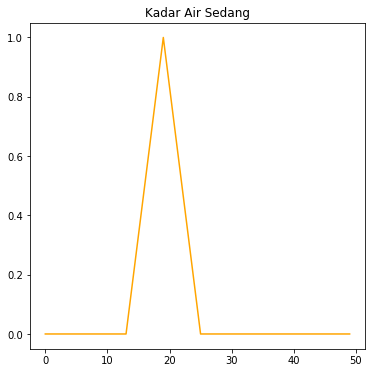

In [93]:
kadar_air_sedang = fuzz.trimf(kadar_air_x,[13,19,25])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_air_x,kadar_air_sedang,'orange')
ax0.set_title('Kadar Air Sedang')

Plotting fungsi keanggotaan $\mu KadarAirTinggi(x)$

Text(0.5,1,'Kadar Air Tinggi')

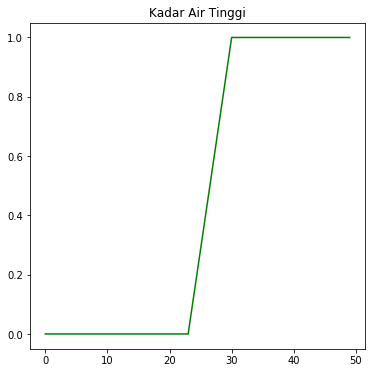

In [94]:
kadar_air_tinggi = fuzz.trapmf(kadar_air_x,[23,30,50,50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_air_x,kadar_air_tinggi,'green')
ax0.set_title('Kadar Air Tinggi')

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


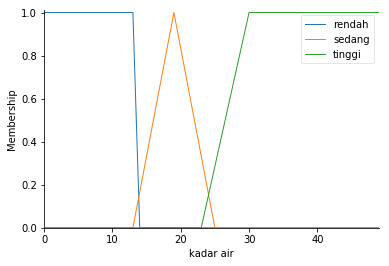

In [95]:
kadar_air.view()

In [96]:
kadar_hampa = ctrl.Antecedent(np.arange(0, 20, 1), 'kadar hampa')
kadar_hampa_x = np.arange(0, 20, 1)

# Fuzzifikasi Kadar Hampa

Untuk kadar hampa, fungsi keanggotaan dibagi menjadi 3 bagian :

Kadar hampa tersebut dinyatakan sedikit ketika mempunyai nilai hampa 0 - 3 %.

Kadar hampa tersebut dinyatakan sedang ketika mempunyai nilai hampa 2 - 6 %.

Kadar hampa tersebut dinyatakan sedang ketika mempunyai nilai hampa 8 - 20 %.

<div class="alert alert-warning">

Dengan fungsi keanggotaan kadar hampa
$$ \mu Sedikit [x] = 
\begin{cases}
    1 & ; x \leq 2\\
    \frac{(3-x)}{(3-1)} & ; 2 \leq  x \leq\ 3 \\
    0 & ; x \geq 3
\end{cases}
$$

$$ \mu Sedang [x] = 
\begin{cases}
    0 & ; x \leq 2\\
    \frac{(x-2)}{(6-2)} & ; 2 \leq x \leq\ 6 \\
    \frac{(10-x)}{(10-6)} & ; 6 \leq  x \leq\ 10 \\
\end{cases}
$$

$$ \mu Banyak [x] = 
\begin{cases}
    0 & ; x \leq 8\\
    \frac{(x-8)}{(12-8)} & ; 8 \leq x \leq\ 12 \\
    1 & ; x \geq 12\\
\end{cases}
$$

In [97]:
kadar_hampa['sedikit'] = fuzz.trapmf(kadar_hampa.universe, [0, 0, 2, 3])
kadar_hampa['sedang'] = fuzz.trimf(kadar_hampa.universe, [2, 6, 10])
kadar_hampa['banyak'] = fuzz.trapmf(kadar_hampa.universe, [8, 12, 20, 20])

### PLOTTING MEMBERSHIP FUNCTION KADAR HAMPA

Plotting fungsi keanggotaan $\mu KadarHampaSedikit(x)$

Text(0.5,1,'Kadar Air Sedikit')

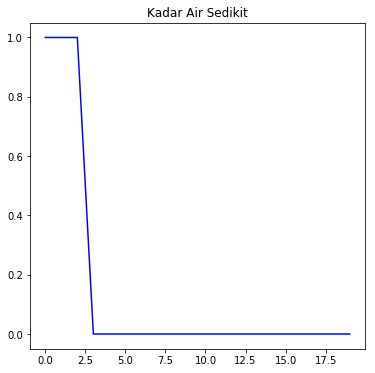

In [98]:
kadar_hampa_sedikit = fuzz.trapmf(kadar_hampa_x,[0,0,2,3])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_hampa_x,kadar_hampa_sedikit,'blue')
ax0.set_title('Kadar Air Sedikit')

Plotting fungsi keanggotaan $\mu KadarHampaSedang(x)$

Text(0.5,1,'Kadar Air Sedang')

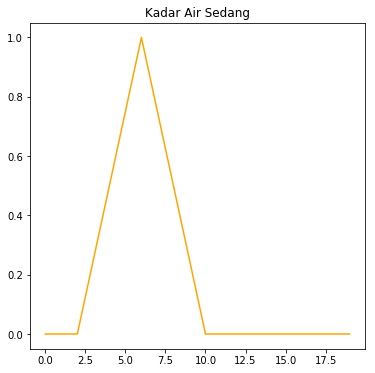

In [99]:
kadar_hampa_sedang = fuzz.trimf(kadar_hampa_x,[2,6,10])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_hampa_x,kadar_hampa_sedang,'orange')
ax0.set_title('Kadar Air Sedang')

Plotting fungsi keanggotaan $\mu KadarHampaBanyak(x)$

Text(0.5,1,'Kadar Air Tinggi')

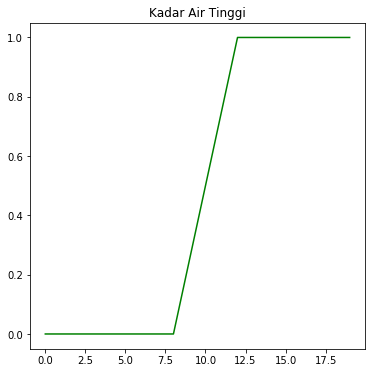

In [100]:
kadar_hampa_banyak = fuzz.trapmf(kadar_hampa_x,[8,12,20,20])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_hampa_x,kadar_hampa_banyak,'green')
ax0.set_title('Kadar Air Tinggi')

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


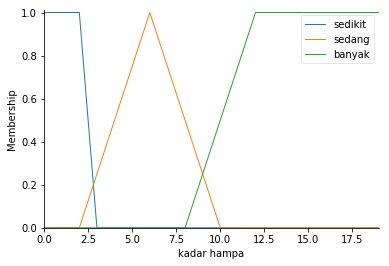

In [101]:
kadar_hampa.view()

In [102]:
harga_kualitas = ctrl.Consequent(np.arange(3500, 5500, 1), 'harga kualitas')
harga_kualitas_x = np.arange(3500, 5500, 1)

### FUZZIFIKASI HARGA KUALITAS

Harga kualitas dibagi menjadi 3 fungsi keanggotaan yakni :
1. Rendah = Rp.3500 - Rp.4100
2. GKP = Rp.4000 - Rp.4700
3. GKG = Rp.4500 - Rp.5000

<div class="alert alert-warning">

Dengan fungsi keanggotaan harga kualitas
$$ \mu Rendah [z] = 
\begin{cases}
    1 & ; z \leq 3750 \\
    \frac{(4100-z)}{(4100-3750)} & ; 3750 \leq  z \leq\ 4100 \\
    0 & ; z \geq 4100 \\
\end{cases}
$$

$$ \mu GKP [z] = 
\begin{cases}
    0 & ; z \leq 4000\\
    \frac{(z-4000)}{(4400-4000)} & ;4000 \leq z \leq\ 4400 \\
    \frac{(4700-z)}{(4700-4400)} & ; 4400 \leq  z \leq\ 4700 \\
    0 & ; z \geq 4500
\end{cases}
$$

$$ \mu GKG [z] = 
\begin{cases}
    0 & ; z \leq 4500\\
    \frac{(z-4500)}{(5000-4500)} & ;4500 \leq z \leq\ 5000 \\
    1 & ; x \geq 5000\\
\end{cases}
$$

In [103]:
harga_kualitas['rendah'] = fuzz.trapmf(harga_kualitas.universe, [3500,3500,3750,4100])
harga_kualitas['gkp'] = fuzz.trimf(harga_kualitas.universe, [4000,4400,4700])
harga_kualitas['gkg'] = fuzz.trapmf(harga_kualitas.universe, [4500, 5000, 5500, 5500])

### PLOTTING MEMBERSHIP FUNCTION HARGA KUALITAS

Plotting fungsi keanggotaan $\mu HargaKualitasRendah(x)$

Text(0.5,1,'Harga Kualitas Rendah')

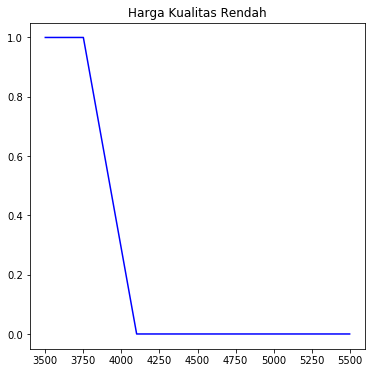

In [104]:
harga_kualitas_rendah = fuzz.trapmf(harga_kualitas_x,[3500,3500,3750,4100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_kualitas_x,harga_kualitas_rendah,'blue')
ax0.set_title('Harga Kualitas Rendah')

Plotting fungsi keanggotaan $\mu HargaKualitasGKP(x)$

Text(0.5,1,'Harga Kualitas GKP')

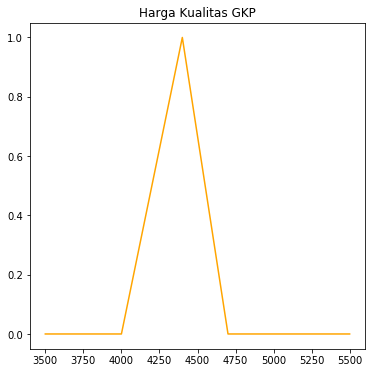

In [105]:
harga_kualitas_gkp = fuzz.trimf(harga_kualitas_x,[4000,4400,4700])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_kualitas_x,harga_kualitas_gkp,'orange')
ax0.set_title('Harga Kualitas GKP')

Plotting fungsi keanggotaan $\mu HargaKualitasGKP(x)$

Text(0.5,1,'Harga Kualitas GKG')

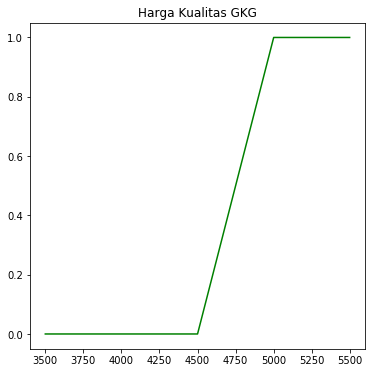

In [106]:
harga_kualitas_gkg = fuzz.trapmf(harga_kualitas_x,[4500,5000,5500,5500])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_kualitas_x,harga_kualitas_gkg,'green')
ax0.set_title('Harga Kualitas GKG')

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


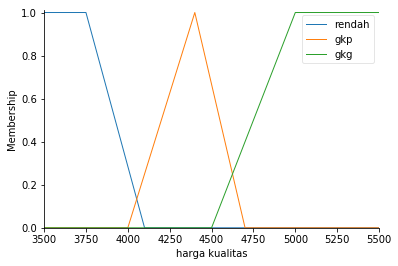

In [107]:
harga_kualitas.view()

### Inferencing
pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF.... THEN....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel kadar air yang berjumlah 3 dan fuzzifikasi dari variabel kadar hampa yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

1. IF Kadar Air RENDAH dan Kadar Hampa SEDIKIT THEN Harga Kualitas GKG
2. IF Kadar Air RENDAH dan Kadar Hampa SEDANG THEN Harga Kualitas GKP
3. IF Kadar Air RENDAH dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH
4. IF Kadar Air SEDANG dan Kadar Hampa SEDIKIT THEN Harga Kualitas GKP
5. IF Kadar Air SEDANG dan Kadar Hampa SEDANG THEN Harga Kualitas GKP
6. IF Kadar Air SEDANG dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH
7. IF Kadar Air TINGGI dan Kadar Hampa SEDIKIT THEN Harga Kualitas RENDAH
8. IF Kadar Air TINGGI dan Kadar Hampa SEDANG THEN Harga Kualitas RENDAH
9. IF Kadar Air TINGGI dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH

In [108]:
rule1 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['sedikit'], harga_kualitas['gkg'])
rule2 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['sedang'], harga_kualitas['gkp'])
rule3 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['banyak'], harga_kualitas['rendah'])
rule4 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['sedikit'], harga_kualitas['gkp'])
rule5 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['sedang'], harga_kualitas['gkp'])
rule6 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['banyak'], harga_kualitas['rendah'])
rule7 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['sedikit'], harga_kualitas['rendah'])
rule8 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['sedang'], harga_kualitas['rendah'])
rule9 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['banyak'], harga_kualitas['rendah'])

### RULE EVALUATION

In [109]:
harga_kualitas_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### DEFUZZIFIKASI

In [110]:
nilai = ctrl.ControlSystemSimulation(harga_kualitas_ctrl)

Input kadar air kita masukan 12 dan kadar hampa 2

In [111]:
nilai.input['kadar air'] = 12
nilai.input['kadar hampa'] = 2

Melakukan perhitungan defuzzifikasi

In [112]:
nilai.compute()

Mencetak hasil output defuzzifikasi

In [113]:
print(nilai.output['harga kualitas'])

5110.592567868268


Plotting fungsi keangggotaan kadar air setelah dimasukkan input nilai pada kadar air

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


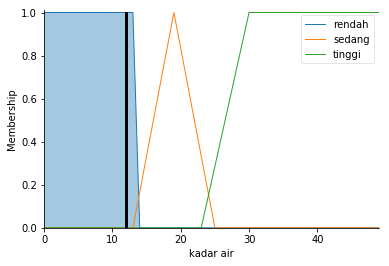

In [114]:
kadar_air.view(sim=nilai)

Plotting fungsi keangggotaan kadar hampa setelah dimasukkan input nilai pada kadar hampa

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


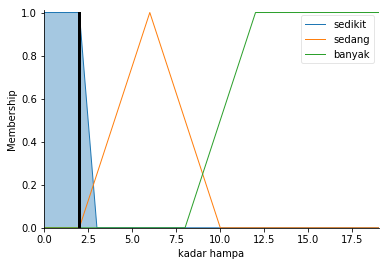

In [115]:
kadar_hampa.view(sim=nilai)

Plotting fungsi keangggotaan harga kualitas setelah dilakukan perhitungan defuzzifikasi output nilai pada harga kualitas

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


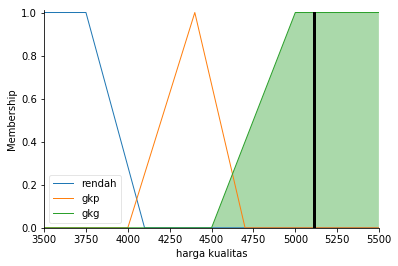

In [116]:
harga_kualitas.view(sim=nilai)

### Perhitungan Manual